In [12]:
from utils import *

# Fig. 3 Pie chart

Text(0.5, 1.0, '$8-class$')

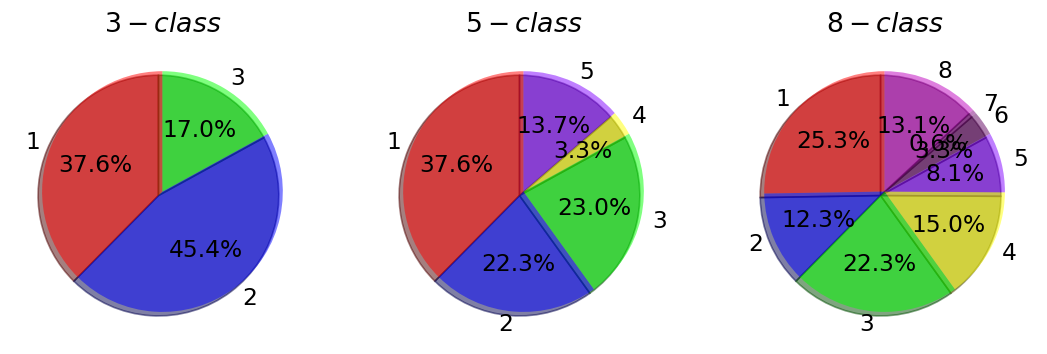

In [7]:
#3-class
# load data
X = sio.loadmat("classification_data")
X = X["Xdata"]

fig, axes = plt.subplots(1, 3, figsize=(11, 6))


y3 = sio.loadmat("Class3")
y3 = y3["Class3"]
y3 = y3.reshape(-1)
cm_bright = mcolors.ListedColormap(['#FF0000', '#0000FF','#00FF00'])
unique_elements, counts_elements = np.unique(y3, return_counts=True)

axes[0].pie(counts_elements, labels=unique_elements, autopct = '%1.1f%%', colors=cm_bright.colors, wedgeprops={'alpha':0.5}
        ,shadow = True, startangle = 90, textprops = {'fontsize' : 14})
axes[0].set_title("$3-class$",fontsize=16)



#5-class
# load data
y5 = sio.loadmat("Class5")
y5 = y5["Class5"]
y5 = y5.reshape(-1)
cm_bright = mcolors.ListedColormap(['#FF0000', '#0000FF','#00FF00','#ffff00','#8000ff'])

unique_elements, counts_elements = np.unique(y5, return_counts=True)

axes[1].pie(counts_elements, labels=unique_elements, autopct = '%1.1f%%', colors=cm_bright.colors, wedgeprops={'alpha':0.5}
        ,shadow = True, startangle = 90, textprops = {'fontsize' : 14})
axes[1].set_title("$5-class$",fontsize=16)


#8-class
# load data
y8 = sio.loadmat("Class8")
y8 = y8["Class8"]
y8 = y8.reshape(-1)
cm_bright = mcolors.ListedColormap(['#FF0000', '#0000FF','#00FF00','#ffff00','#8000ff','#5F005F', '#7F007F','#BF00BF'])

unique_elements, counts_elements = np.unique(y8, return_counts=True)

axes[2].pie(counts_elements, labels=unique_elements, autopct = '%1.1f%%', colors=cm_bright.colors, wedgeprops={'alpha':0.5}
        ,shadow = True, startangle = 90, textprops = {'fontsize' : 14})
axes[2].set_title("$8-class$",fontsize=16)



# Fig. 5: 2D maps attained by applying PCA, LDA, and t-SNE to the Tower Damage(3-class) data set.

(8000, 49) (8000, 1)


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


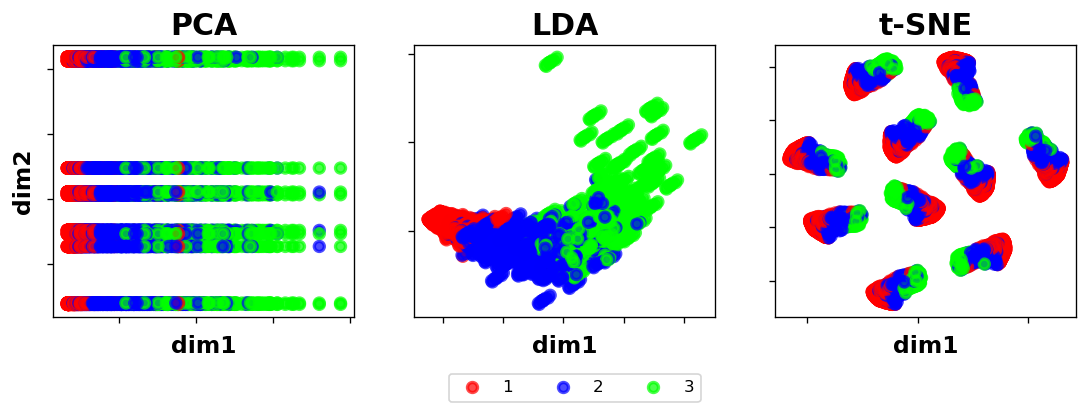

In [4]:
# load data

X = sio.loadmat("classification_data")
y = sio.loadmat("Class3")
X = X["Xdata"]
y = y["Class3"]
print(X.shape, y.shape)
# use preprocessing (MinMaxScaler or some other techniques.)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X) #X_normalized

labels = ['1','2','3']
cm_bright = ListedColormap(['#FF0000', '#0000FF','#00FF00'])

 
X_r = PCA(n_components=2).fit(X).transform(X)
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
X_r3 = TSNE(n_components=2, perplexity=100).fit_transform(X)


fig, axes = plt.subplots(1, 3, figsize=(11, 3))
scatter0=axes[0].scatter(X_r[:, 0], X_r[:, 1], c=y, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[0].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[0].set_ylabel("dim2",fontweight ='bold',fontsize=14)
axes[0].xaxis.set_major_formatter(NullFormatter())
axes[0].yaxis.set_major_formatter(NullFormatter())
axes[0].axis('tight')
axes[0].set_title("PCA",fontweight ='bold',fontsize=18)

scatter1=axes[1].scatter(X_r2[:, 0], X_r2[:, 1], c=y,alpha=.7,  lw=2,cmap=cm_bright) #,edgecolors='k',
axes[1].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[1].xaxis.set_major_formatter(NullFormatter())
axes[1].yaxis.set_major_formatter(NullFormatter())
axes[1].axis('tight')
axes[1].set_title("LDA",fontweight ='bold',fontsize=18)

scatter2=axes[2].scatter(X_r3[:, 0], X_r3[:, 1], c=y, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[2].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[2].xaxis.set_major_formatter(NullFormatter())
axes[2].yaxis.set_major_formatter(NullFormatter())
axes[2].axis('tight')
axes[2].set_title("t-SNE",fontweight ='bold',fontsize=18)

fig.legend(ncol=3,loc='lower center',bbox_to_anchor=(0.52,- 0.135),shadow=False, scatterpoints=1 ,handles=scatter2.legend_elements()[0],labels= labels,fontsize=10)
plt.show()

# Figure 6: 2D maps attained by t-SNE on the Tower Damage(3-class) data set for perp= 5, 30, 50, 100.

findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


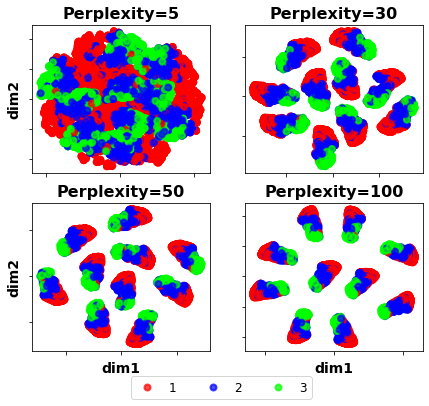

In [8]:
# Create projection
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
for i, perplexity in enumerate([5,30]):
    a = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    scatter=axes[0][i].scatter(a[:,0], a[:,1], c=y, alpha=.7, lw=2,cmap=cm_bright)
    axes[0][i].set_title("Perplexity=%d" % perplexity,fontweight ='bold',fontsize=16)
    axes[0][i].xaxis.set_major_formatter(NullFormatter())
    axes[0][i].yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate([50,100]):
    a = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    scatter=axes[1][i].scatter(a[:,0], a[:,1], c=y, alpha=.7, lw=2,cmap=cm_bright)
    axes[1][i].set_title("Perplexity=%d" % perplexity,fontweight ='bold',fontsize=16)
    axes[1][i].xaxis.set_major_formatter(NullFormatter())
    axes[1][i].yaxis.set_major_formatter(NullFormatter())
    axes[1][i].set_xlabel("dim1",fontweight ='bold',fontsize=14)
 
axes[0][0].set_ylabel("dim2",fontweight ='bold',fontsize=14)
axes[1][0].set_ylabel("dim2",fontweight ='bold',fontsize=14)
fig.legend(ncol=3,loc='lower center',bbox_to_anchor=(0.5,0), shadow=False, scatterpoints=1,handles=scatter.legend_elements()[0],labels= labels,fontsize=12) #,title="class"

plt.show()

# Figure 7: 2D maps attained by applying PCA, LDA, and t-SNE to the training set of Tower Damage(3-class) data set using option 3 vs. option 4.

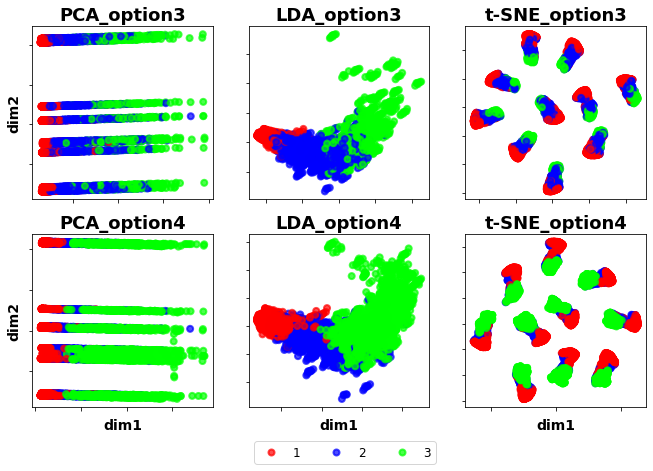

In [9]:
# load data

X = sio.loadmat("classification_data")
y = sio.loadmat("Class3")
X = X["Xdata"]
y = y["Class3"]

# use preprocessing (MinMaxScaler or some other techniques.)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X) #X_normalized

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

labels = ['1','2','3']
cm_bright = ListedColormap(['#FF0000', '#0000FF','#00FF00'])
fig, axes = plt.subplots(2, 3, figsize=(11, 7))

#imbalance 
X_r = PCA(n_components=2).fit(X_train).transform(X_train)
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train).transform(X_train)
X_r3 = TSNE(n_components=2, perplexity=100).fit_transform(X_train)

scatter00=axes[0][0].scatter(X_r[:, 0], X_r[:, 1], c=y_train, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[0][0].set_ylabel("dim2",fontweight ='bold',fontsize=14)
axes[0][0].xaxis.set_major_formatter(NullFormatter())
axes[0][0].yaxis.set_major_formatter(NullFormatter())
axes[0][0].axis('tight')
axes[0][0].set_title("PCA_option3" ,fontweight ='bold',fontsize=18)

scatter01=axes[0][1].scatter(X_r2[:, 0], X_r2[:, 1], c=y_train,alpha=.7,  lw=2,cmap=cm_bright) #,edgecolors='k',

axes[0][1].xaxis.set_major_formatter(NullFormatter())
axes[0][1].yaxis.set_major_formatter(NullFormatter())
axes[0][1].axis('tight')
axes[0][1].set_title("LDA_option3" ,fontweight ='bold',fontsize=18)

scatter02=axes[0][2].scatter(X_r3[:, 0], X_r3[:, 1], c=y_train, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[0][2].xaxis.set_major_formatter(NullFormatter())
axes[0][2].yaxis.set_major_formatter(NullFormatter())
axes[0][2].axis('tight')
axes[0][2].set_title("t-SNE_option3" ,fontweight ='bold',fontsize=18)


#balance
#Synthetic Minority Over-sampling Technique on train data
smote = SMOTE(random_state = 0)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

X_r_bal = PCA(n_components=2).fit(X_train_bal).transform(X_train_bal)
X_r2_bal = LinearDiscriminantAnalysis(n_components=2).fit(X_train_bal, y_train_bal).transform(X_train_bal)
X_r3_bal = TSNE(n_components=2, perplexity=100).fit_transform(X_train_bal)



scatter10=axes[1][0].scatter(X_r_bal[:, 0], X_r_bal[:, 1], c=y_train_bal, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[1][0].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[1][0].set_ylabel("dim2",fontweight ='bold',fontsize=14)
axes[1][0].xaxis.set_major_formatter(NullFormatter())
axes[1][0].yaxis.set_major_formatter(NullFormatter())
axes[1][0].axis('tight')
axes[1][0].set_title("PCA_option4" ,fontweight ='bold',fontsize=18)

scatter11=axes[1][1].scatter(X_r2_bal[:, 0], X_r2_bal[:, 1], c=y_train_bal,alpha=.7,  lw=2,cmap=cm_bright) #,edgecolors='k',
axes[1][1].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[1][1].xaxis.set_major_formatter(NullFormatter())
axes[1][1].yaxis.set_major_formatter(NullFormatter())
axes[1][1].axis('tight')
axes[1][1].set_title("LDA_option4" ,fontweight ='bold',fontsize=18)

scatter12=axes[1][2].scatter(X_r3_bal[:, 0], X_r3_bal[:, 1], c=y_train_bal, alpha=.7, lw=2,cmap=cm_bright)#,edgecolors='k'
axes[1][2].set_xlabel("dim1",fontweight ='bold',fontsize=14)
axes[1][2].xaxis.set_major_formatter(NullFormatter())
axes[1][2].yaxis.set_major_formatter(NullFormatter())
axes[1][2].axis('tight')
axes[1][2].set_title("t-SNE_option4" ,fontweight ='bold',fontsize=18)


fig.legend(ncol=3,loc='lower center',bbox_to_anchor=(0.52,0), shadow=False, scatterpoints=1,handles=scatter10.legend_elements()[0],labels= labels,fontsize=12) #,title="class"

plt.show()

In [13]:
n_trial=10
# Order: pre,rec,f1,accuracy,auc,running time
op1_result=option1(X,y)
op2_result=option2(X,y)
op3_PCA_result=option3(X,y,method='PCA',n_components=2)
op3_LDA_result=option3(X,y,method='LDA',n_components=2)
op4_PCA_result=option4(X,y,method='PCA',n_components=2)
op4_LDA_result=option4(X,y,method='LDA',n_components=2)
n_trial=5
op4_TSNE_result=option4(X,y,method='TSNE',n_components=2)
op3_TSNE_result=option3(X,y,method='TSNE',n_components=2)

In [14]:
op1_result

[['KNN', array([0.85, 0.85, 0.85, 0.82, 0.93, 0.1 ])],
 ['SVM', array([0.86, 0.86, 0.86, 0.84, 0.97, 3.73])],
 ['DT', array([0.89, 0.89, 0.88, 0.84, 0.97, 0.05])],
 ['RF', array([0.86, 0.86, 0.85, 0.81, 0.96, 0.03])],
 ['MLP', array([0.86, 0.87, 0.87, 0.84, 0.97, 4.81])],
 ['AdaBoost', array([0.75, 0.71, 0.71, 0.65, 0.87, 0.63])]]

In [15]:
op2_result

[['KNN', array([0.85, 0.84, 0.84, 0.84, 0.93, 0.12])],
 ['SVM', array([0.86, 0.85, 0.85, 0.86, 0.97, 5.69])],
 ['DT', array([0.9 , 0.88, 0.88, 0.89, 0.97, 0.11])],
 ['RF', array([0.86, 0.84, 0.84, 0.86, 0.96, 0.06])],
 ['MLP', array([0.85, 0.84, 0.84, 0.85, 0.96, 5.15])],
 ['AdaBoost', array([0.81, 0.81, 0.81, 0.78, 0.92, 1.06])]]

In [16]:
op3_PCA_result

[['KNN', array([0.75, 0.76, 0.75, 0.73, 0.86, 0.08])],
 ['SVM', array([0.8 , 0.81, 0.81, 0.78, 0.92, 2.35])],
 ['DT', array([0.82, 0.81, 0.81, 0.77, 0.93, 0.01])],
 ['RF', array([0.81, 0.8 , 0.8 , 0.78, 0.92, 0.03])],
 ['MLP', array([0.79, 0.79, 0.79, 0.77, 0.92, 1.33])],
 ['AdaBoost', array([0.7 , 0.51, 0.39, 0.54, 0.62, 0.15])]]

In [17]:
op3_LDA_result

[['KNN', array([0.85, 0.85, 0.85, 0.83, 0.93, 0.08])],
 ['SVM', array([0.87, 0.87, 0.87, 0.85, 0.95, 1.85])],
 ['DT', array([0.85, 0.85, 0.85, 0.84, 0.96, 0.02])],
 ['RF', array([0.86, 0.86, 0.86, 0.83, 0.96, 0.04])],
 ['MLP', array([0.86, 0.86, 0.86, 0.84, 0.97, 1.65])],
 ['AdaBoost', array([0.64, 0.65, 0.64, 0.6 , 0.79, 0.18])]]

In [18]:
op4_PCA_result

[['KNN', array([0.74, 0.73, 0.73, 0.73, 0.85, 0.09])],
 ['SVM', array([0.79, 0.78, 0.77, 0.8 , 0.91, 3.9 ])],
 ['DT', array([0.81, 0.79, 0.79, 0.81, 0.92, 0.02])],
 ['RF', array([0.81, 0.79, 0.79, 0.81, 0.92, 0.05])],
 ['MLP', array([0.78, 0.76, 0.76, 0.78, 0.92, 1.59])],
 ['AdaBoost', array([0.7 , 0.51, 0.39, 0.55, 0.63, 0.19])]]

In [19]:
op4_LDA_result

[['KNN', array([0.83, 0.83, 0.83, 0.84, 0.92, 0.09])],
 ['SVM', array([0.86, 0.86, 0.86, 0.87, 0.95, 3.12])],
 ['DT', array([0.86, 0.85, 0.85, 0.87, 0.96, 0.02])],
 ['RF', array([0.86, 0.85, 0.85, 0.87, 0.96, 0.06])],
 ['MLP', array([0.86, 0.85, 0.85, 0.86, 0.97, 1.78])],
 ['AdaBoost', array([0.64, 0.65, 0.64, 0.6 , 0.84, 0.23])]]

In [20]:
op4_TSNE_result

[['KNN', array([ 0.8 ,  0.79,  0.79,  0.79,  0.9 , 23.07])],
 ['SVM', array([ 0.81,  0.81,  0.81,  0.8 ,  0.92, 30.58])],
 ['DT', array([ 0.59,  0.52,  0.42,  0.59,  0.77, 20.98])],
 ['RF', array([ 0.7 ,  0.63,  0.63,  0.66,  0.83, 19.73])],
 ['MLP', array([ 0.69,  0.66,  0.65,  0.71,  0.81, 36.58])],
 ['AdaBoost', array([ 0.6 ,  0.58,  0.57,  0.63,  0.69, 23.25])]]

In [21]:
op3_TSNE_result

[['KNN', array([ 0.8 ,  0.8 ,  0.8 ,  0.78,  0.91, 27.51])],
 ['SVM', array([ 0.82,  0.82,  0.82,  0.78,  0.92, 33.48])],
 ['DT', array([ 0.72,  0.66,  0.62,  0.55,  0.81, 24.52])],
 ['RF', array([ 0.74,  0.73,  0.72,  0.67,  0.88, 23.15])],
 ['MLP', array([ 0.65,  0.63,  0.62,  0.57,  0.78, 22.28])],
 ['AdaBoost', array([ 0.66,  0.63,  0.62,  0.58,  0.74, 24.66])]]

# Fig. 8. Classifier comparison 
using PCA, LDA, and t-SNE in Tower Damage(3-class) data set with options 3 (without SMOTE) and 4 (with SMOTE). The training points are shown in solid colors with a circle shape, while the testing points are shown with a square shape. In each row of the figure, there is one sub-figure displaying input data resulted from one DR method (DR is shown in the y-axis), and six sub-figures presenting decision boundaries for six classifiers. There are two rows for each DR method; the first row represents option 3, in which the training set is imbalanced, and the second row represents option 4, in which the training set is balanced with SMOTE.

findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


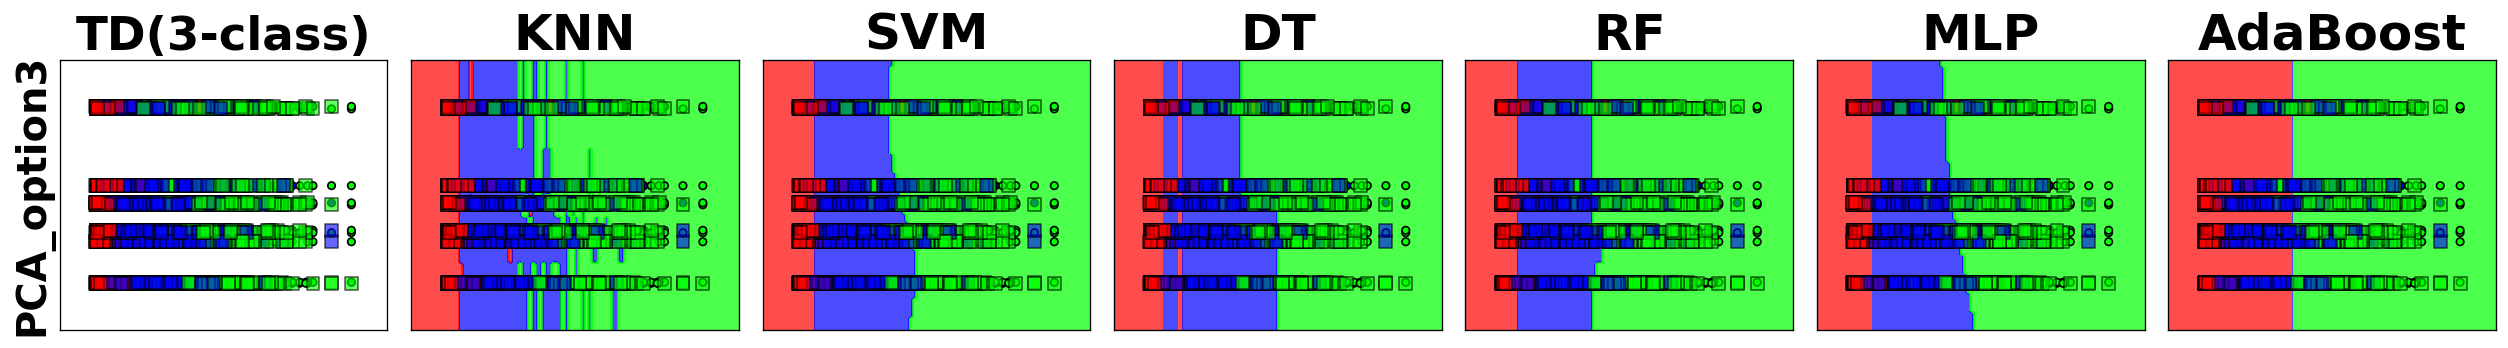

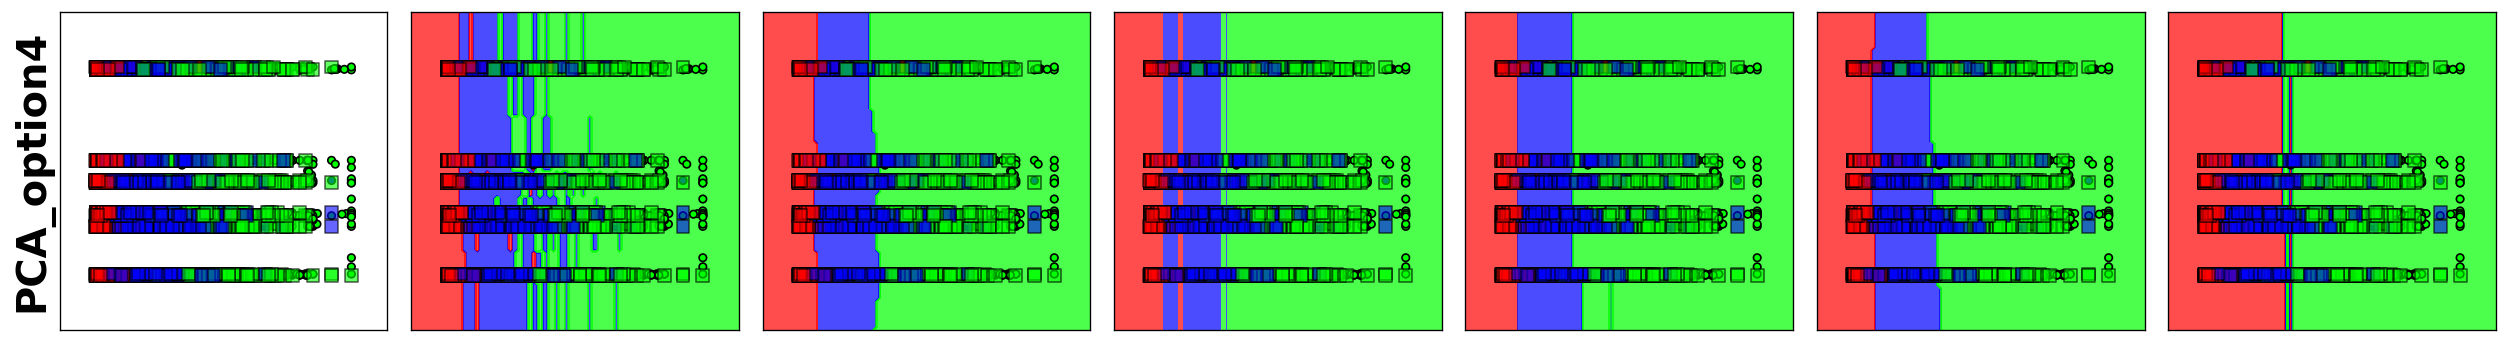

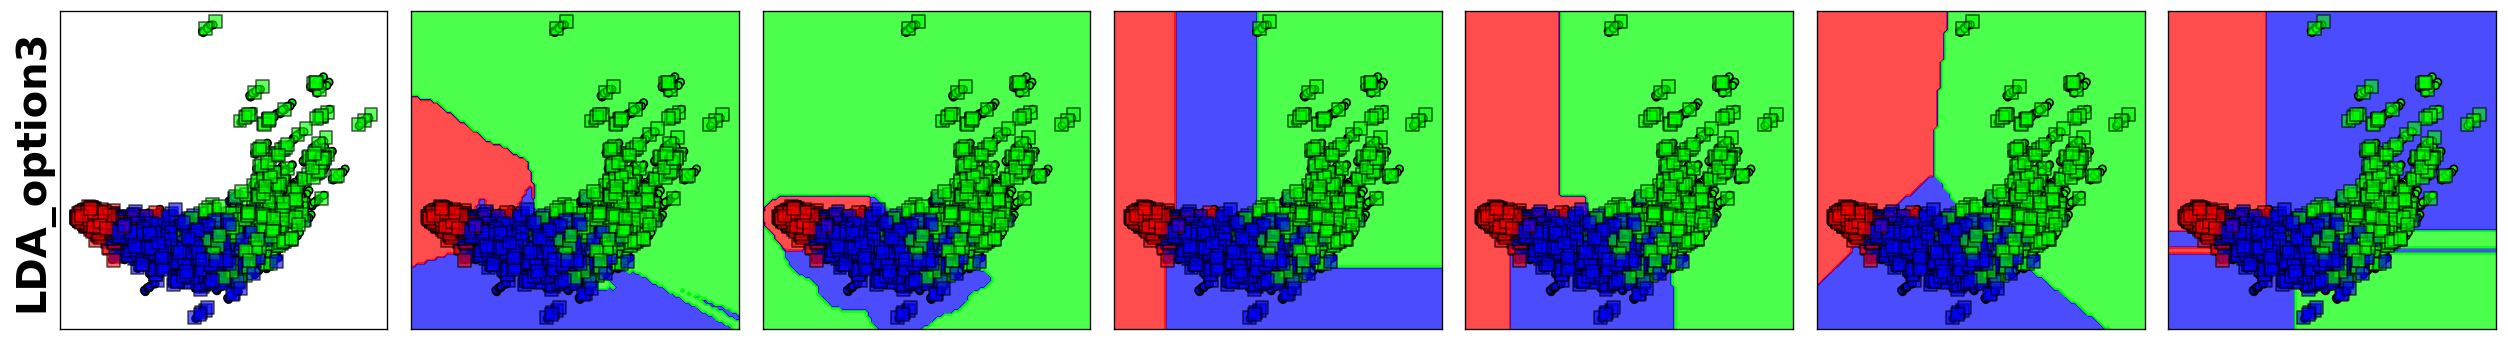

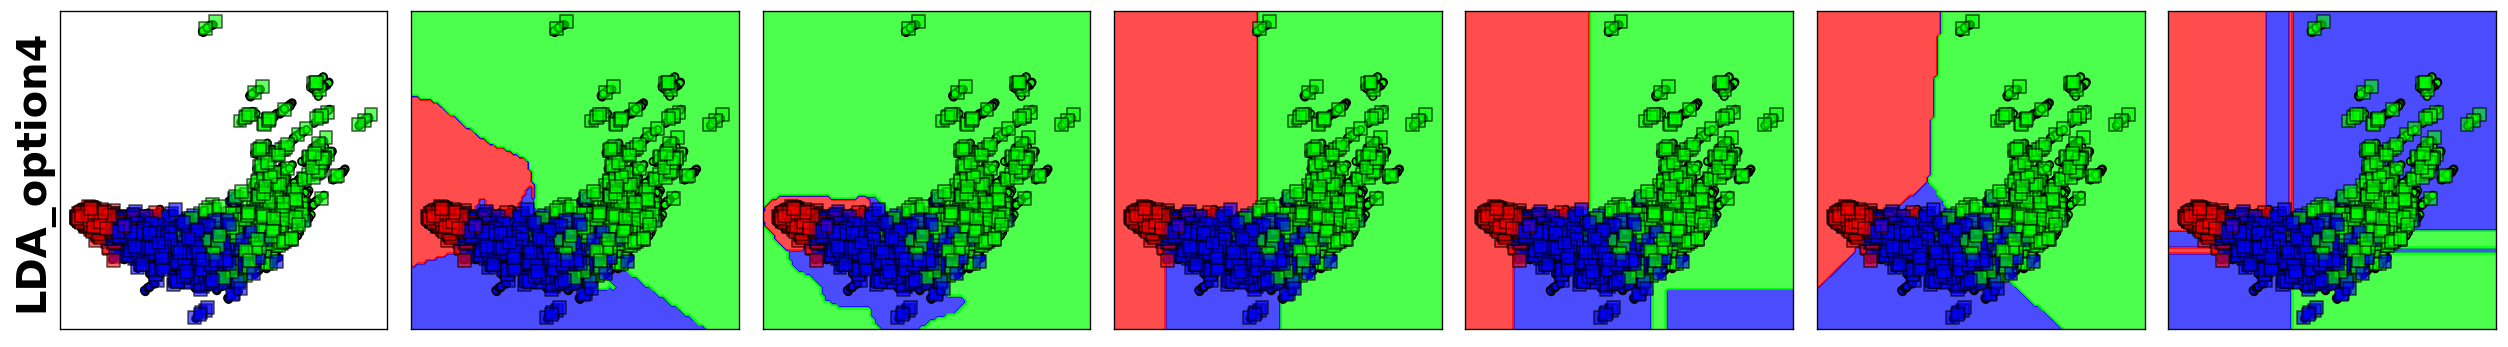

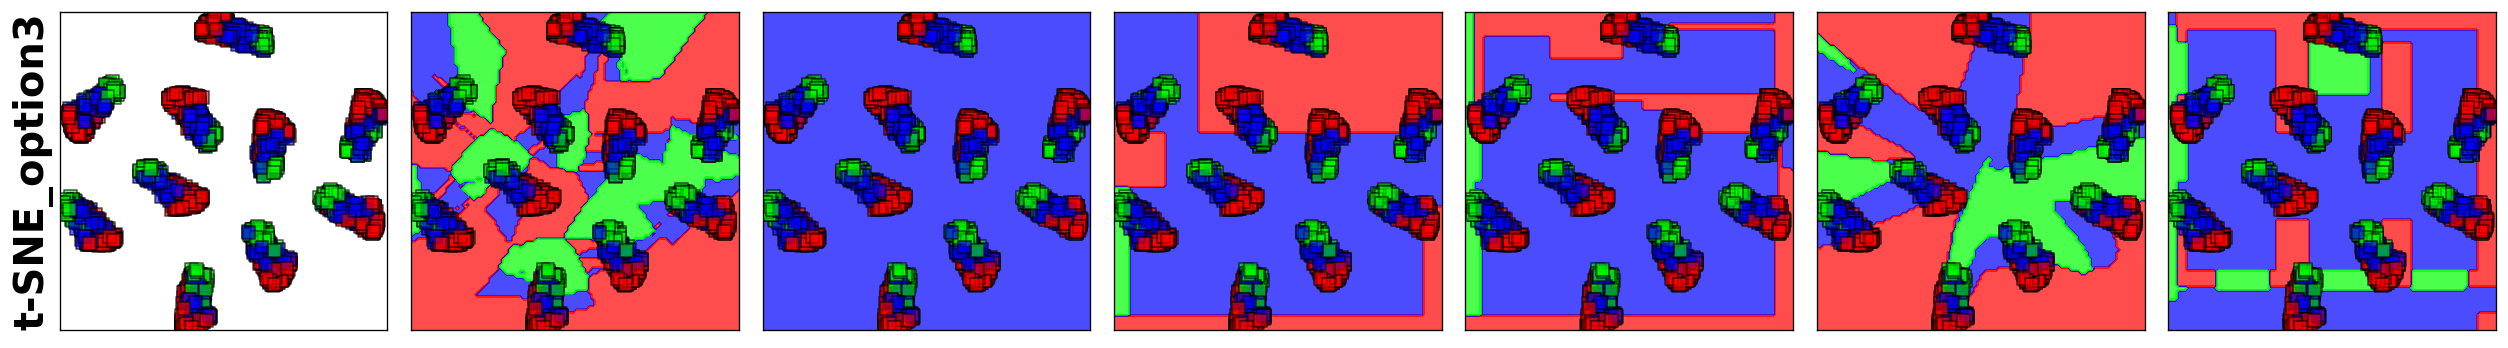

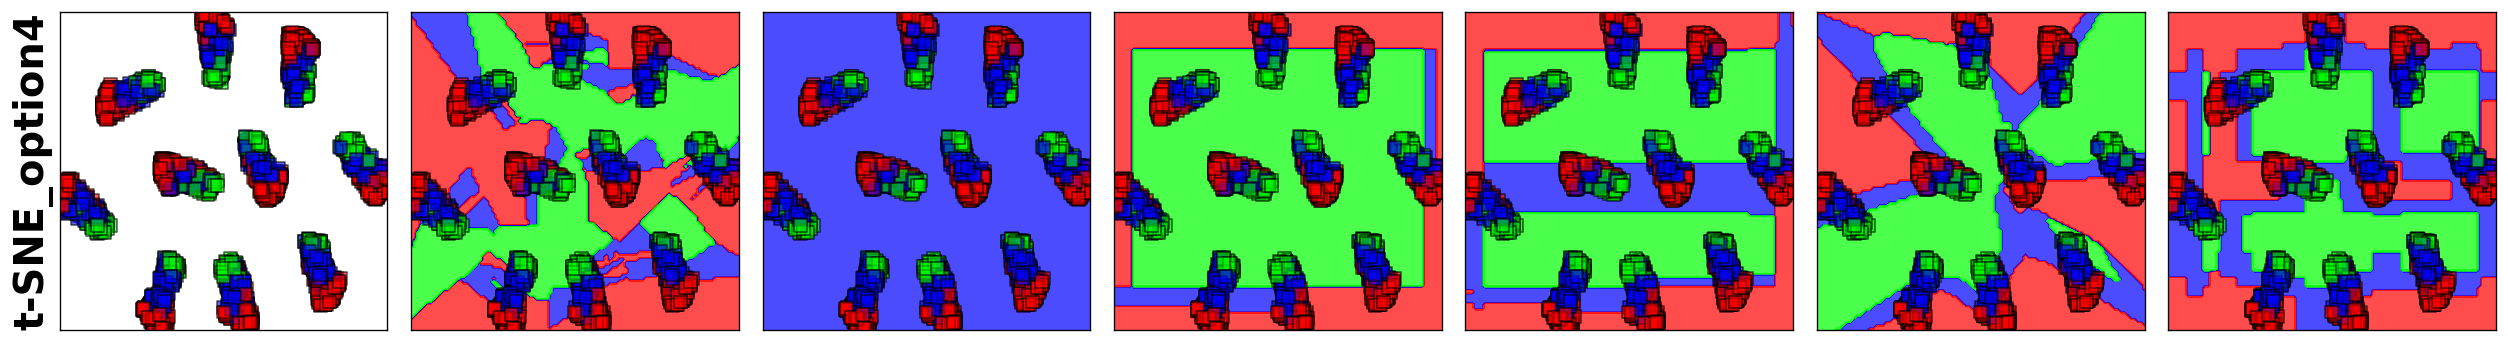

In [22]:
min_max_scaler = MinMaxScaler()
# load data
X = sio.loadmat("classification_data")
y = sio.loadmat("Class3")
X = X["Xdata"]
y = y["Class3"]
datasets = [(X, y)]
cm_bright = ListedColormap(['#FF0000', '#0000FF','#00FF00'])
#PCA_option3
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='PCA',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("TD(3-class)", fontweight ='bold',fontsize=28)
        ax.set_ylabel("PCA_option3", fontweight ='bold',fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1],s=20,  c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1],marker='s',s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf',response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60, 
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontweight ='bold',fontsize=30)

        i += 1

plt.tight_layout()
plt.show()
#PCA_option4
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='PCA',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:

        ax.set_ylabel("PCA_option4", fontweight ='bold',fontsize=24)
        

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1],marker='s',s=60,  c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X,plot_method='contourf', response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1],s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60,
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()    

#LDA_option3
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='LDA',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
#         ax.set_title("3-class", fontweight ='bold',fontsize=18)
        ax.set_ylabel("LDA_option3", fontweight ='bold',fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1],s=20,  c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1],marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf',response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60, 
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name, fontweight ='bold',fontsize=18)

        i += 1

plt.tight_layout()
plt.show()
#LDA_option4
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='LDA',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:

        ax.set_ylabel("LDA_option4", fontweight ='bold',fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1],marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X,plot_method='contourf', response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1],s=20,  c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60, 
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()    

#t-SNE_option3
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='TSNE',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
#         ax.set_title("3-class", fontweight ='bold',fontsize=18)
        ax.set_ylabel("t-SNE_option3", fontweight ='bold',fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1],marker='s',s=60,  c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, plot_method='contourf',response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1],s=20,  c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60, 
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name, fontweight ='bold',fontsize=18)

        i += 1

plt.tight_layout()
plt.show()
#t-SNE_option4
figure = plt.figure(figsize=(21, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = min_max_scaler.fit_transform(X)
    X,y=DR(X,y,method='TSNE',n_components=2)
    #     split data
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.3, random_state=2)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:

        ax.set_ylabel("t-SNE_option4", fontweight ='bold',fontsize=24)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1],s=20,  c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1],marker='s', s=60, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X,plot_method='contourf', response_method="predict",cmap=cm_bright, alpha=0.7, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], s=20, c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],marker='s',s=60, 
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

plt.tight_layout()
plt.show()    